# **A/B Testing**

> **Definition:** A/B testing involves creating two versions (A and B) of a particular element (like a webpage, email, or advertisement) and showing each version to different groups of people. The goal is to see which version gets better results based on specific metrics (like click-through rates, conversions, or engagement).







### **Example**
Imagine you have an online store and want to find out which version of your homepage gets more sales:

*   *Version A:* Your current homepage with a blue "Buy Now" button.
*   *Version B:* A new version of your homepage with a green "Buy Now" button.

You randomly show Version A to half of your visitors and Version B to the other half. After a set period, you compare the sales from both groups to see which button color led to more purchases.

If Version B (green button) results in more sales, you might decide to permanently change your homepage to use the green "Buy Now" button.

### **Business Example**

**Hypothesis**: Changing the "Buy Now" button from blue to green will increase the number of visitors who buy my product.

We use **click-through-probability** instead of click-through-rate as a metric because it provides a more individualized and precise prediction of user behavior.

    Estimating Click-Through-Probability:
    
Binomial Distribution:
*   Models the number of clicks (successes) in a set of impressions (trials).
*   Example: 100 impressions and 10 clicks follow a binomial distribution.






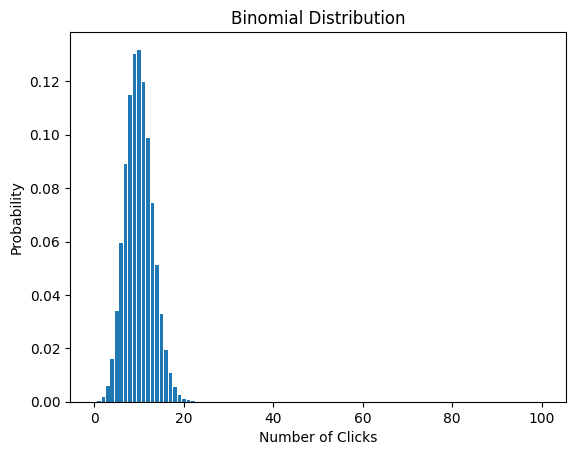

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm as stats
import statsmodels.api as sm
import math

# Parameters
n = 100   # Number of trials (impressions)
p = 0.1   # Probability of success (click-through rate)

# Binomial Distribution
x = np.arange(0, n+1)
binomial_dist = binom.pmf(x, n, p)

# Plotting
plt.bar(x, binomial_dist)
plt.xlabel('Number of Clicks')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.show()

Confidence Intervals:

  * Estimate the precision of the click-through probability (CTP) estimation.
  * Provide a range where the true probability is likely to be found.

Calculating Confidence Intervals:

  * Use statistical techniques (binomial distribution and CI formula) to calculate the range for CTP with a confidence level (95%).

In [18]:
# Example data
clicks = 10
impressions = 100

# Calculate the proportion
p_hat = clicks / impressions

# Calculate the confidence interval
conf_int = sm.stats.proportion_confint(clicks, impressions, alpha=0.05, method='binom_test')
print(f'95% Confidence Interval: {conf_int}')


95% Confidence Interval: (0.0533912365173399, 0.17400045468614206)


Null and Alternative Hypothesis:

  * Null Hypothesis (H₀): Assumes no effect or no difference (e.g., CTP is equal between two versions).
  * Alternative Hypothesis (H₁): Assumes there is an effect or difference (e.g., CTP is different between two versions).

Comparing Two Samples:

  * Compare the CTP between two groups (version A and version B) to determine which performs better.

In [19]:
# Example data for two versions
clicks_A = 10
impressions_A = 100
clicks_B = 15
impressions_B = 120

# Proportions
p1 = clicks_A / impressions_A
p2 = clicks_B / impressions_B

print(f'CTP for Version A: {p1}')
print(f'CTP for Version B: {p2}')

CTP for Version A: 0.1
CTP for Version B: 0.125



Pooled Standard Error:

  * Combines the standard errors of two samples to compare their means:

In [20]:
def pooled_standard_error(p1, n1, p2, n2):
    return math.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

# Example usage:
n1 = impressions_A
n2 = impressions_B

se_pooled = pooled_standard_error(p1, n1, p2, n2)
print(f'Pooled Standard Error: {se_pooled}')


Pooled Standard Error: 0.04256123040201415


Statistical Test for Significance
 * Perform a statistical test to evaluate if the difference in CTP between the two groups is significant.

In [22]:
z_score = difference / se_pooled
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f'Z-score: {z_score}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print('The difference is statistically significant.')
else:
    print('The difference is not statistically significant.')

Z-score: 0.5873890337253245
P-value: 0.556942457191937
The difference is not statistically significant.


Practical, or Substantive, Significance

 * Evaluates if the observed difference in CTP is meaningful in a real-world context, beyond just statistical significance.

In [23]:
# Calculate the difference in CTP
difference = p2 - p1
print(f'Difference in CTP: {difference}')

# Check if the difference is practically significant
threshold = 0.05
if abs(difference) > threshold:
    print('The difference is practically significant.')
else:
    print('The difference is not practically significant.')

Difference in CTP: 0.024999999999999994
The difference is not practically significant.


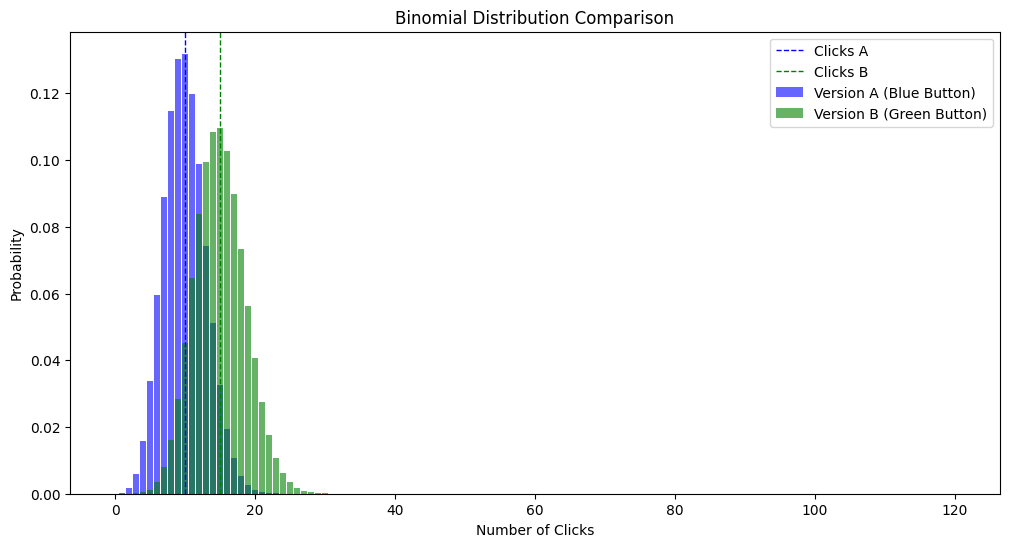

In [24]:
# Plotting the binomial distributions
x_A = np.arange(0, impressions_A + 1)
x_B = np.arange(0, impressions_B + 1)

binom_dist_A = binom.pmf(x_A, impressions_A, p1)
binom_dist_B = binom.pmf(x_B, impressions_B, p2)

plt.figure(figsize=(12, 6))

plt.bar(x_A, binom_dist_A, alpha=0.6, label='Version A (Blue Button)', color='blue')
plt.bar(x_B, binom_dist_B, alpha=0.6, label='Version B (Green Button)', color='green')
plt.axvline(clicks_A, color='blue', linestyle='dashed', linewidth=1, label='Clicks A')
plt.axvline(clicks_B, color='green', linestyle='dashed', linewidth=1, label='Clicks B')
plt.xlabel('Number of Clicks')
plt.ylabel('Probability')
plt.title('Binomial Distribution Comparison')
plt.legend()
plt.show()

### **Conclusion**
Through this project, we have successfully demonstrated the process of estimating and comparing click-through probabilities (CTP) using statistical methods. By applying a binomial distribution and calculating confidence intervals, we provided a precise estimation of CTP. We formulated and tested null and alternative hypotheses to determine if the changes to the "Buy Now" button color had a statistically significant impact. By calculating and comparing pooled standard errors, we ensured robust and accurate comparisons between the two samples. This comprehensive analysis not only highlighted the statistical significance of our findings but also evaluated their practical significance, ensuring that the observed differences are meaningful in a real-world context.